In [18]:
from benchmarks import Experiment
import logging
import os
from functools import wraps
from typing import Any

import torch
import torch.fx as fx
import torch.multiprocessing as mp
import torch.nn as nn
from typing import Any

from graph_prof import GraphProfiler
from graph_tracer import SEPFunction, compile

model_names: list[str] = [
    "Transformer",
    "Resnet18",
    "Resnet50",
]

model_batch_sizes: dict[str, list[int]] = {
    "Transformer": [4, 8, 16, 32],
    "Resnet18": [4, 8, 16, 32],
    "Resnet50": [4, 8, 16, 32],
}

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

def plot_memory_usage(model_name, batch_size):
    data_path = f"results/{model_name}_batch{batch_size}_graph_profiler_stats.json"
    json_data = json.load(open(data_path))
    df = pd.DataFrame(json_data)
    
    plt.figure(figsize=(10, 8))
    # plot all columns of memory usage on the same plot
    columns_to_plot = ['gpu_memory_usages', 'param_memory_usages', 'activation_memory_usages', 'grad_memory_usages', 'other_memory_usages']
    for column in columns_to_plot:
        plt.plot(df[column], label=column)

    plt.axvline(x=df.rank_of_backward[0], color='grey', linestyle='--', label='end of forward pass')

    plt.xlabel('Steps')
    plt.ylabel('Memory Usage (bytes)')
    plt.title(f'Memory Usage for {model_name} with batch size {batch_size} over one training epoch')
    plt.legend()
    plt.savefig(f"results/{model_name}_batch{batch_size}_graph_profiler_stats.png")
    plt.show()
    plt.close()


def plot_memory_usage_versus_batch_size(model_name):
    batch_sizes = [str(batch_size) for batch_size in model_batch_sizes[model_name]]
    peak_memory_usages = []
    for batch_size in batch_sizes:
        data_path = f"results/{model_name}_batch{batch_size}_graph_profiler_stats.json"
        json_data = json.load(open(data_path))
        peak_memory_usages.append(json_data['peak_memory_usage'])
    
    plt.figure(figsize=(10, 8))
    plt.bar(batch_sizes, peak_memory_usages)

    plt.xticks(batch_sizes)

    plt.xlabel('Batch Size')
    plt.ylabel('Peak Memory Usage (bytes)')
    plt.title(f'Peak Memory Usage for {model_name} over different batch sizes')

    plt.savefig(f"results/{model_name}_peak_memory_usage.png")
    plt.show()
    plt.close()

/data/healthy-ml/scratch/maanas/CS265-mlsys-project/graph_tracer.py:246: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with _enable_compile(), torch.autograd.detect_anomaly(check_nan=False):


ProfilerStatistics(time_per_run=78.67686401307583)


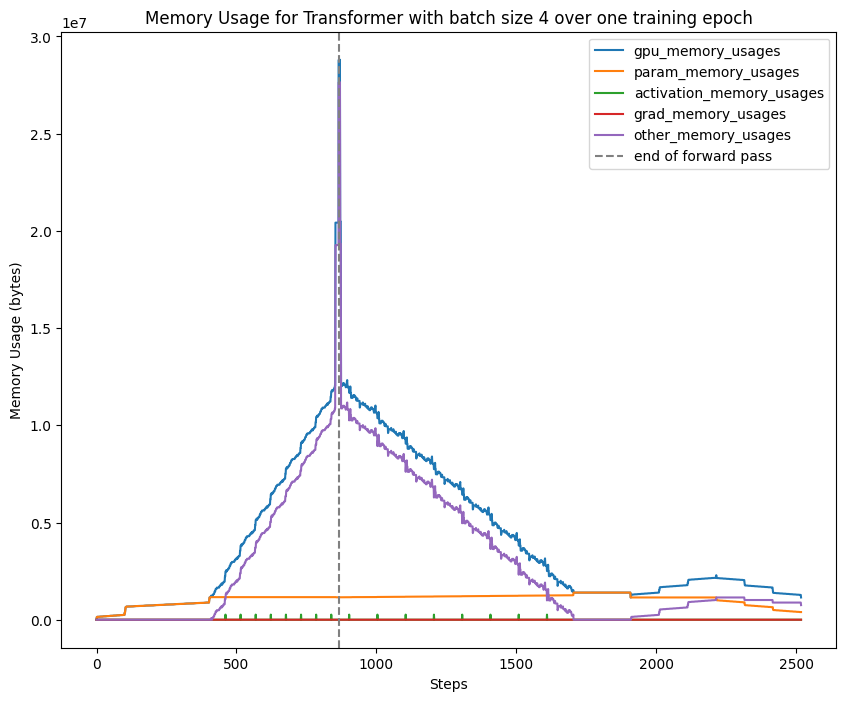

/data/healthy-ml/scratch/maanas/CS265-mlsys-project/graph_tracer.py:246: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with _enable_compile(), torch.autograd.detect_anomaly(check_nan=False):


ProfilerStatistics(time_per_run=80.96665620617568)


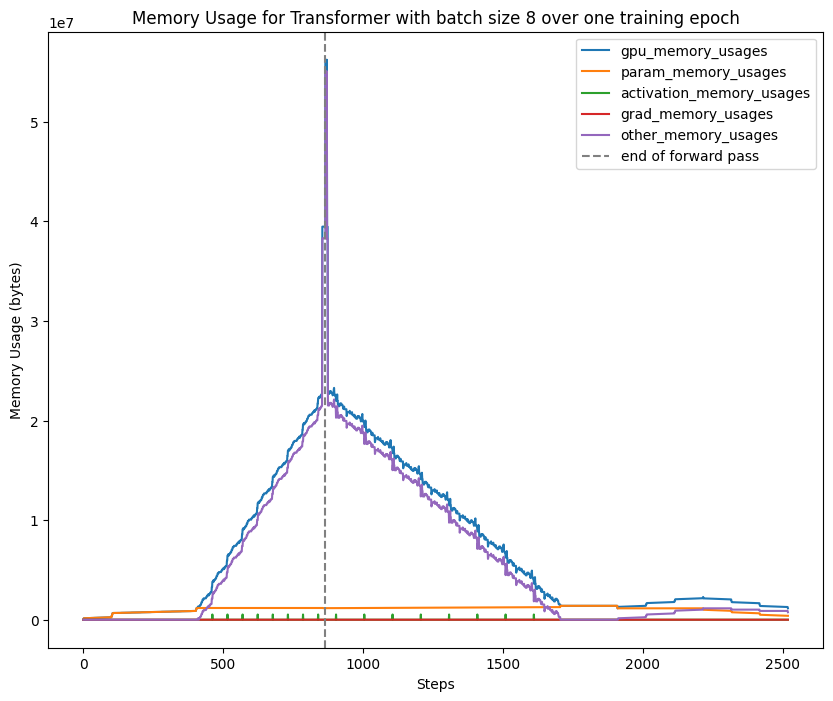

/data/healthy-ml/scratch/maanas/CS265-mlsys-project/graph_tracer.py:246: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with _enable_compile(), torch.autograd.detect_anomaly(check_nan=False):


ProfilerStatistics(time_per_run=77.46956790424883)


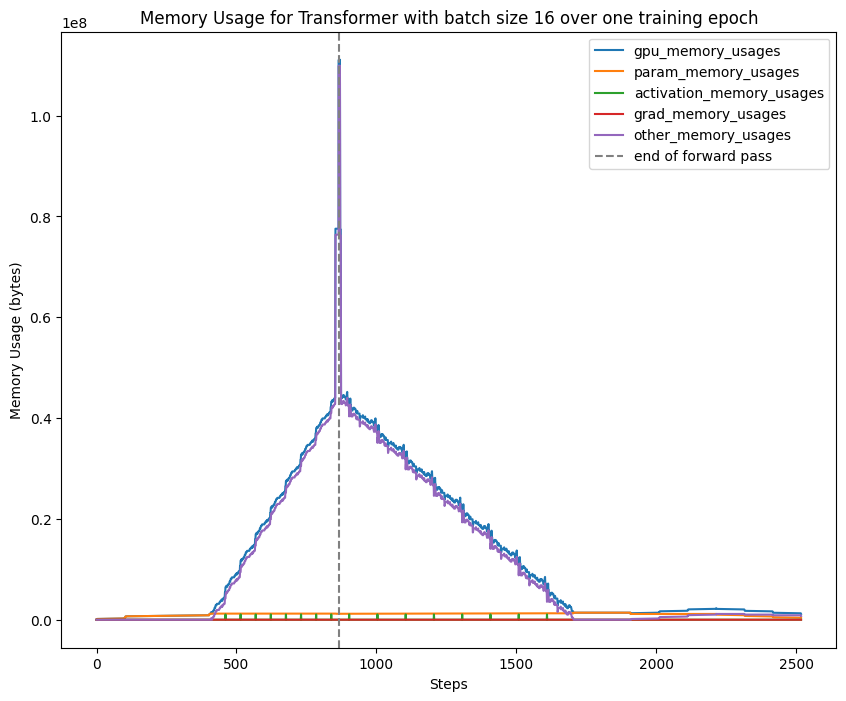

/data/healthy-ml/scratch/maanas/CS265-mlsys-project/graph_tracer.py:246: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with _enable_compile(), torch.autograd.detect_anomaly(check_nan=False):


ProfilerStatistics(time_per_run=80.0983042344451)


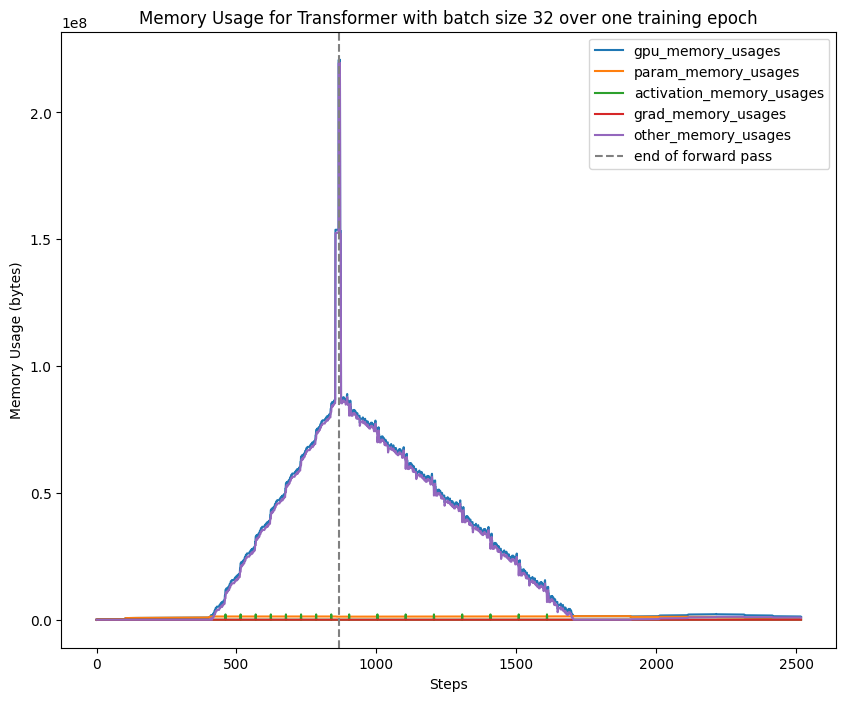

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


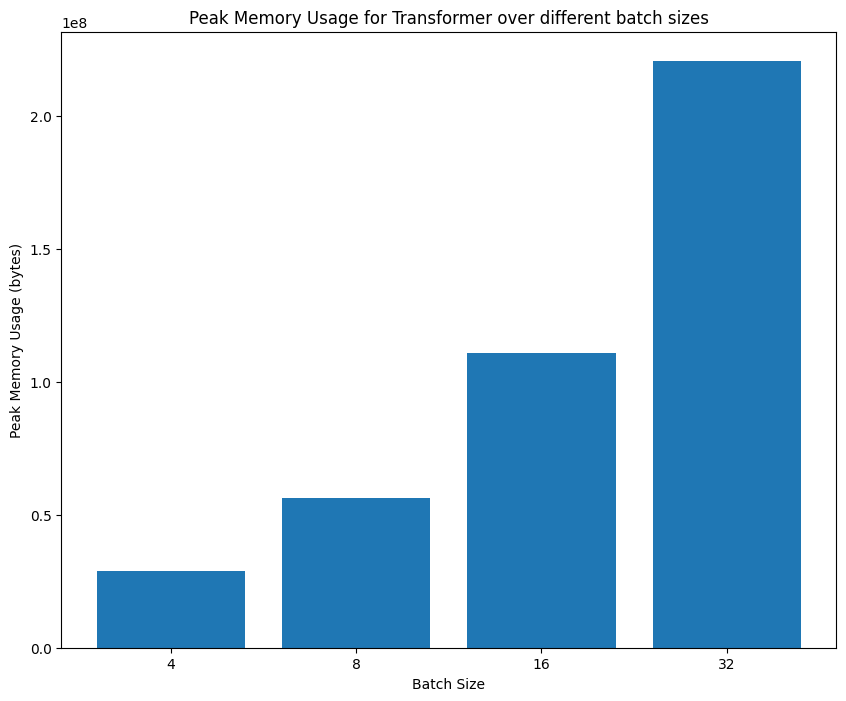

/data/healthy-ml/scratch/maanas/CS265-mlsys-project/graph_tracer.py:246: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with _enable_compile(), torch.autograd.detect_anomaly(check_nan=False):


ProfilerStatistics(time_per_run=34.02649594191462)


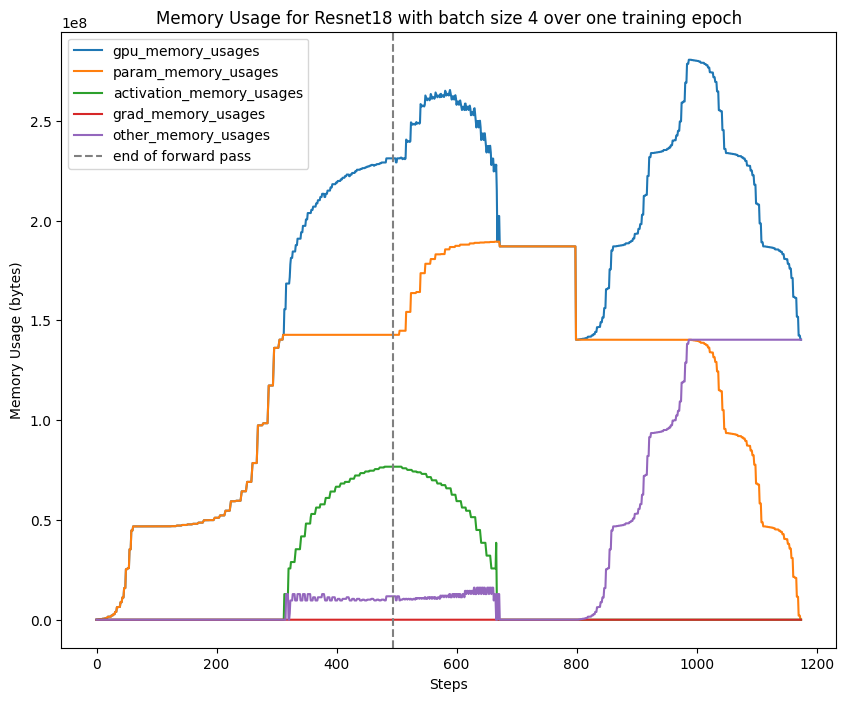

/data/healthy-ml/scratch/maanas/CS265-mlsys-project/graph_tracer.py:246: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with _enable_compile(), torch.autograd.detect_anomaly(check_nan=False):


ProfilerStatistics(time_per_run=35.22047985345125)


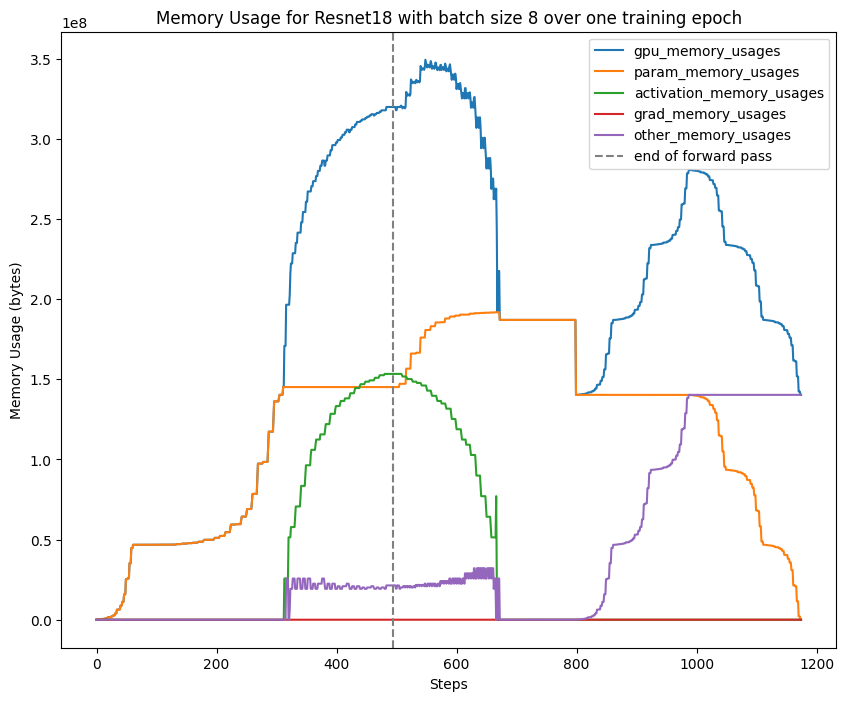

/data/healthy-ml/scratch/maanas/CS265-mlsys-project/graph_tracer.py:246: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with _enable_compile(), torch.autograd.detect_anomaly(check_nan=False):


ProfilerStatistics(time_per_run=37.93100791424513)


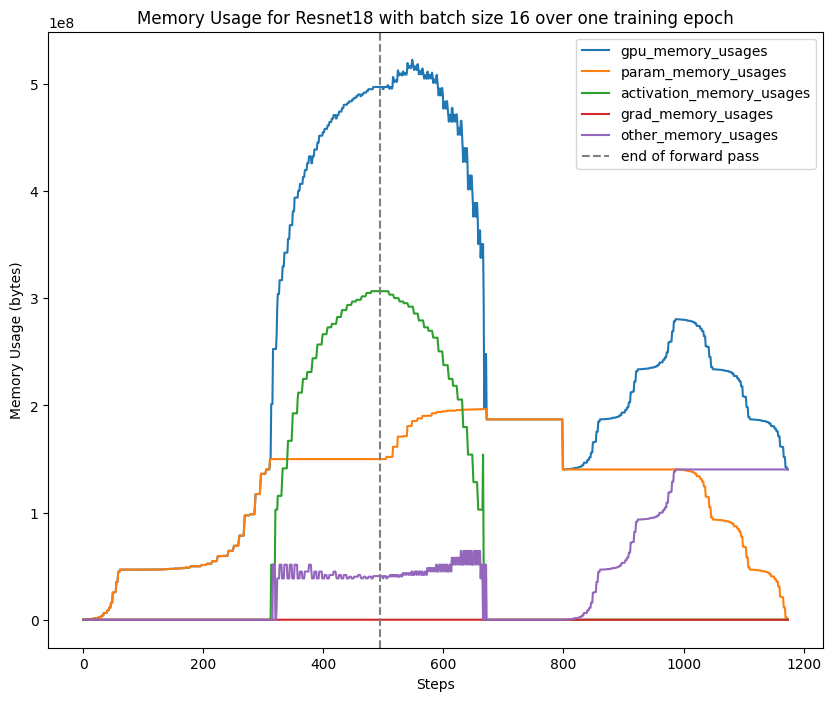

/data/healthy-ml/scratch/maanas/CS265-mlsys-project/graph_tracer.py:246: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with _enable_compile(), torch.autograd.detect_anomaly(check_nan=False):


ProfilerStatistics(time_per_run=42.54105599690229)


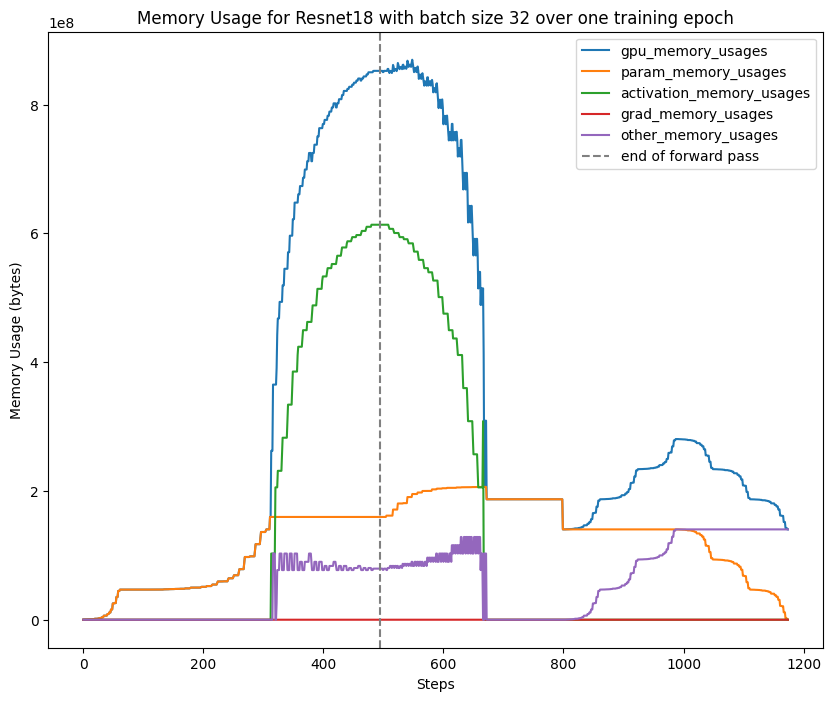

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


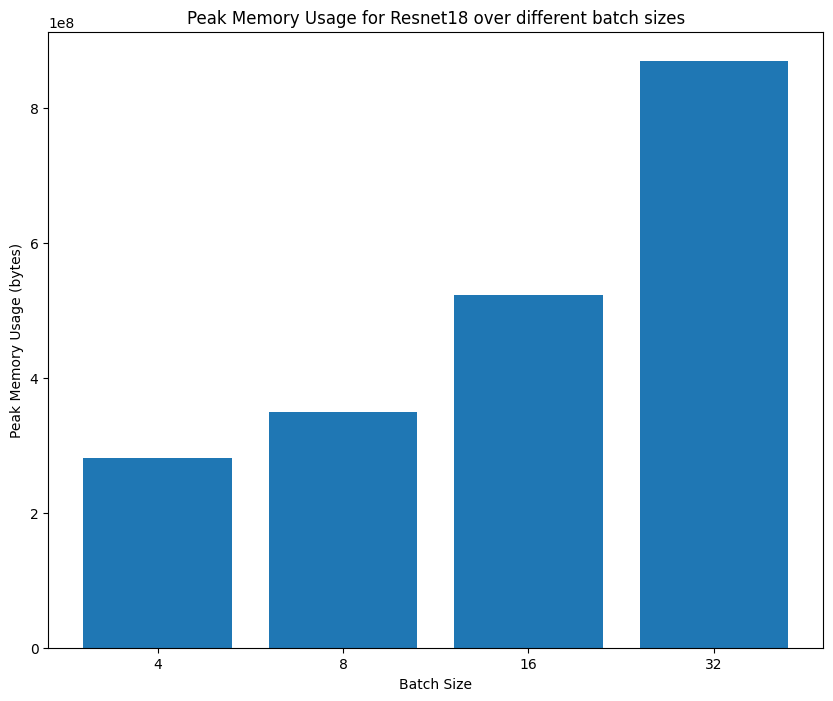

/data/healthy-ml/scratch/maanas/CS265-mlsys-project/graph_tracer.py:246: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with _enable_compile(), torch.autograd.detect_anomaly(check_nan=False):


ProfilerStatistics(time_per_run=95.62329647503793)


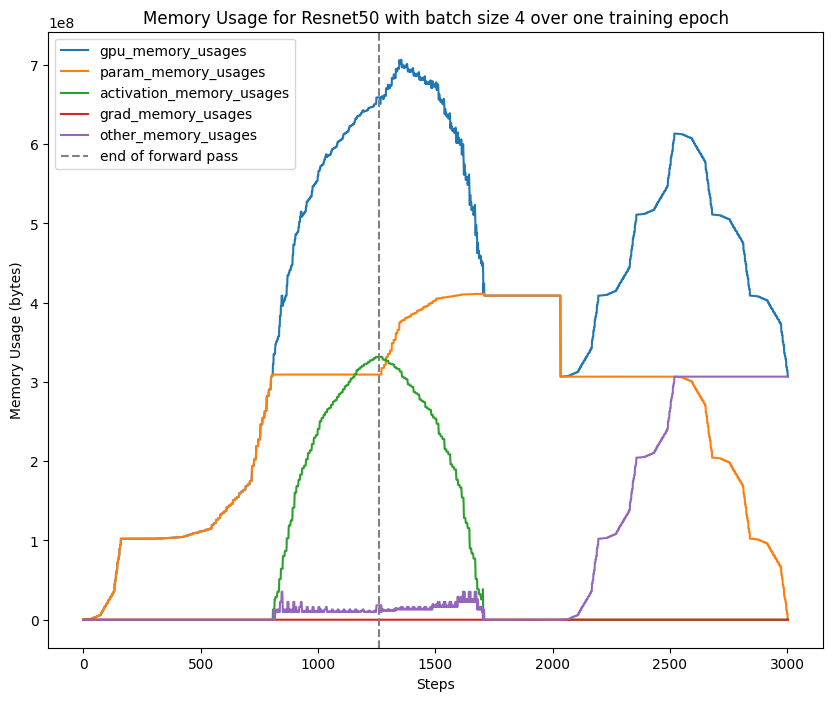

/data/healthy-ml/scratch/maanas/CS265-mlsys-project/graph_tracer.py:246: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with _enable_compile(), torch.autograd.detect_anomaly(check_nan=False):


ProfilerStatistics(time_per_run=97.938432357274)


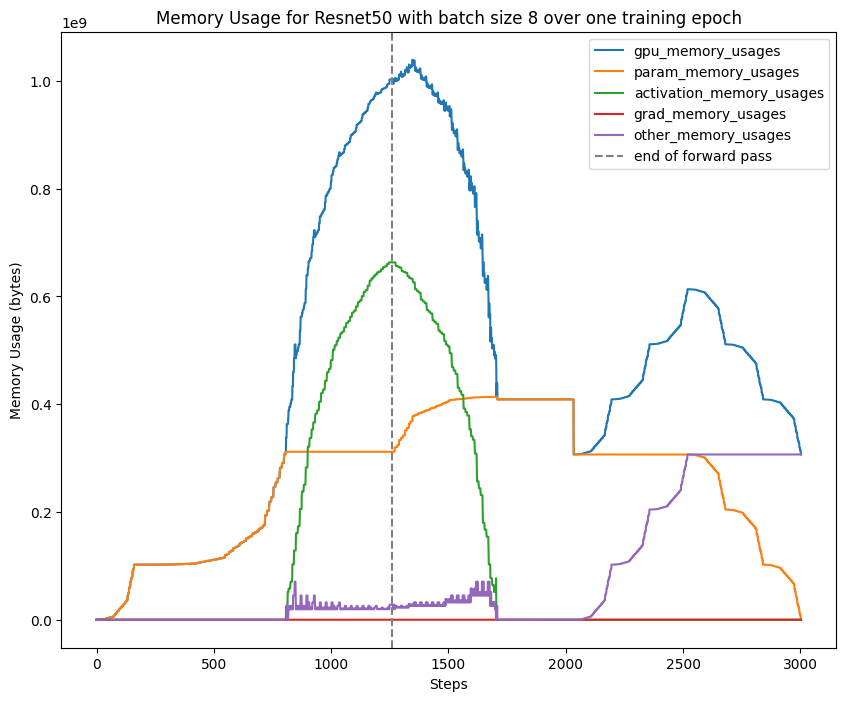

/data/healthy-ml/scratch/maanas/CS265-mlsys-project/graph_tracer.py:246: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with _enable_compile(), torch.autograd.detect_anomaly(check_nan=False):


ProfilerStatistics(time_per_run=105.60204846225679)


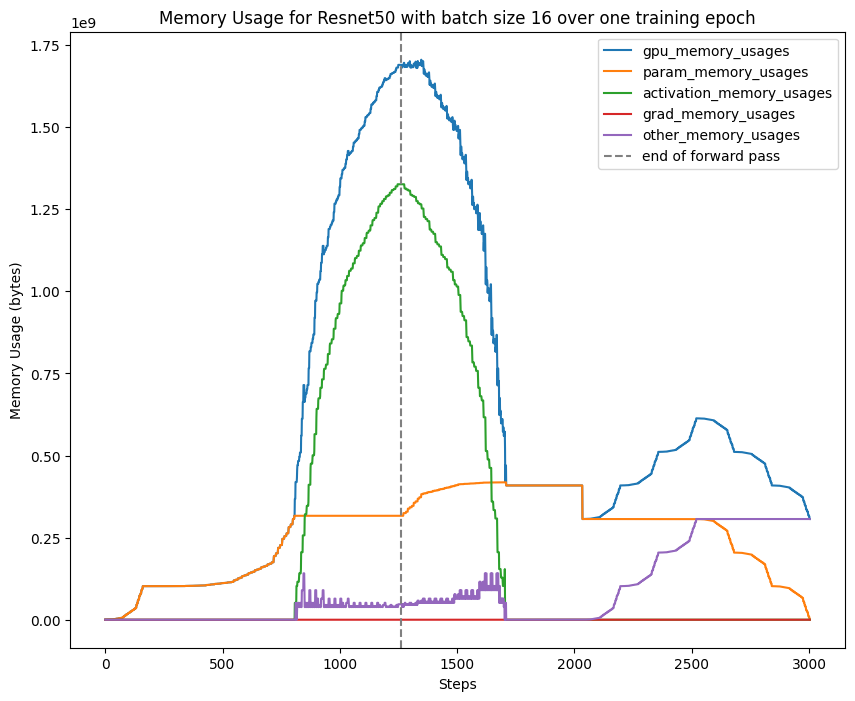

/data/healthy-ml/scratch/maanas/CS265-mlsys-project/graph_tracer.py:246: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with _enable_compile(), torch.autograd.detect_anomaly(check_nan=False):


ProfilerStatistics(time_per_run=120.3722241744399)


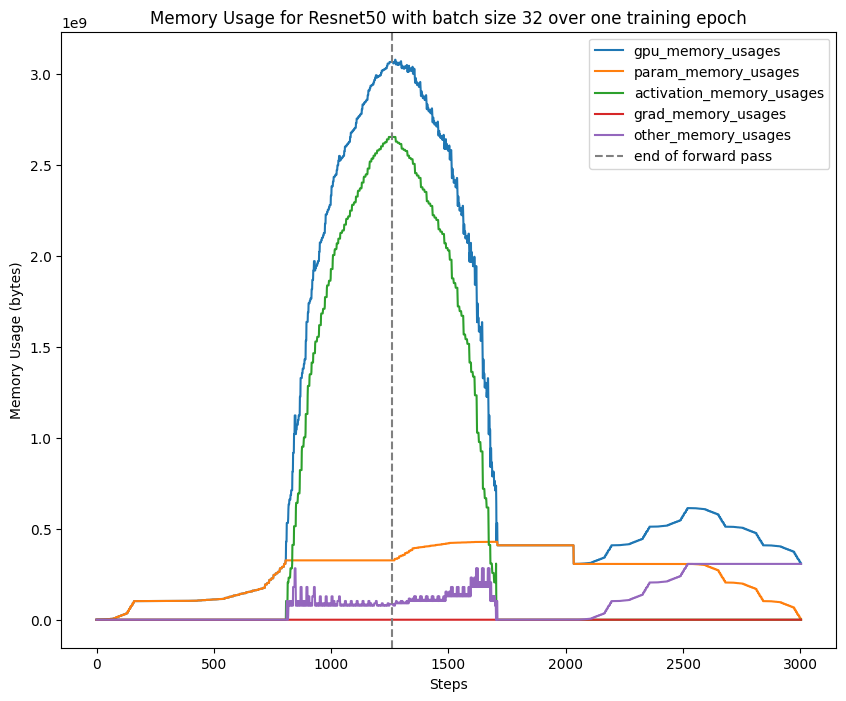

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


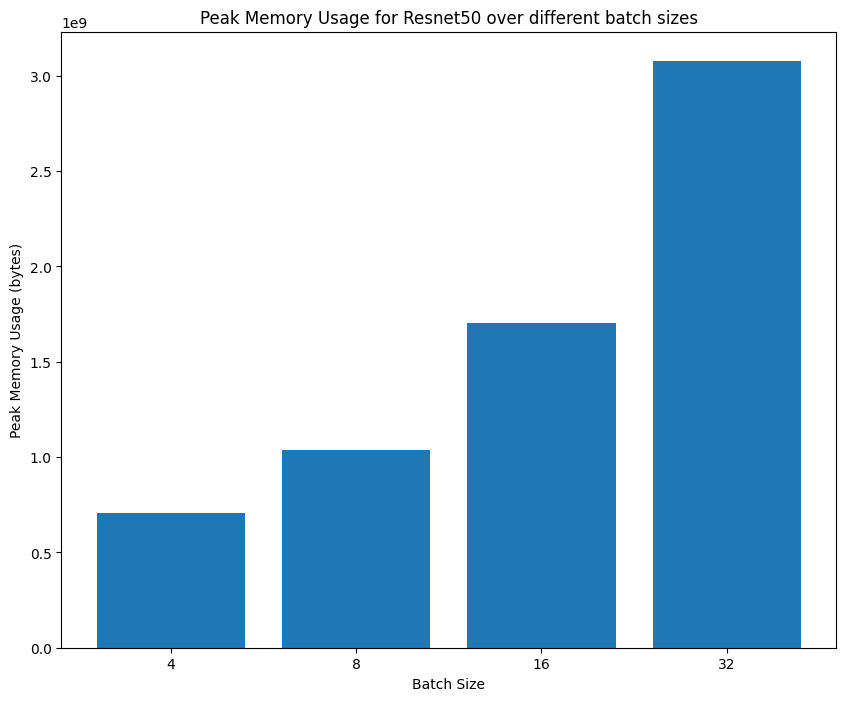

In [19]:
for model_name in model_names:
    for batch_size in model_batch_sizes[model_name]:
        exp = Experiment(model_name, batch_size)
        exp.init_opt_states()
        compiled_fn = compile(exp.train_step, exp.graph_transformation)
        compiled_fn(exp.model, exp.optimizer, exp.example_inputs)

        plot_memory_usage(model_name, batch_size)
    
    plot_memory_usage_versus_batch_size(model_name)